# Load Data and convert to JSON

In [ ]:
import os
import pprint

dataDir = './dataset'
dataset = os.listdir(dataDir)
      
jsonDataSet = dict()


for count, dataFile in enumerate(dataset):

    if dataFile.split(".")[1] == "txt":
        
        fileobj = open(dataDir + "/" + dataFile,'r')
        contents = fileobj.readlines()
        
        title = contents[0].split("-----")[0].split(".")[1]
        date = contents[0].split("-----")[0].split(".")[0][12:]
        text = contents[0].split("-----")[1]
        
        file = {
            "title": title,
            "date": date,
            "text": text,
        }
        
        jsonDataSet.update({count: file})


# Perform Bag of Words

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

for key, value in jsonDataSet.items():
    vect = CountVectorizer(ngram_range=(1, 4), stop_words='english')
    vect.fit(value["text"].split("."))
    X = vect.transform(value["text"].split("."))
    value.update({"bow_matrix": X.toarray()})
    value.update({"bow": vect.inverse_transform(X)[0]})

# TFIDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string 

def preprocessing(line):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    return line

for key, value in jsonDataSet.items():
    
    tfidf_vectorizer = TfidfVectorizer(
        preprocessor=preprocessing,
        ngram_range=(1, 4),
        stop_words='english'
    )
    
    tfidf = tfidf_vectorizer.fit_transform(value["text"].split("."))
    value.update({"tfidf": tfidf})
    value.update({"tfidf_features": tfidf_vectorizer.get_feature_names()})
    value.update({"clusters": dict()})


# KMeans & Scatter Plot of Clusters

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_tsne_pca(data, labels, title, date):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=True)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=True)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset,)
    ax[0].set_title('PCA' + " - " + title + " " + date)
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title("TSNE" + " - " + title + " " + date)


def get_top_keywords(data, clusters, labels, n_terms, value):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    print("-------------------------------------------------")
    print("Top Keywords For Each Cluster For Each File")
    print("-------------------------------------------------")

    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
        value["clusters"].update({ i : [labels[t] for t in np.argsort(r)[-n_terms:]] })
            


#####################################################################################
File Number: 0  -   FBI: from Army CID:   -  13 April, 2003
#####################################################################################
-------------------------------------------------
Top Keywords For Each Cluster For Each File
-------------------------------------------------

Cluster 0
known member domestic militia,wilson known member domestic,man wallace wilson,man wallace,man wallace wilson known,wilson,wallace,wallace wilson,man,known

Cluster 1
seen,loading boxes apex truck,loading boxes apex,mps seen loading boxes,mps seen loading,mps seen,mps,loading boxes,boxes apex,boxes apex truck

Cluster 2
contained 50 cal ammunition,contained 50 cal,contained 50,contained,cal ammunition land,cal ammunition land mines,mines,ammunition land mines,cal,cal ammunition

Cluster 3
employer,driving owned employer apex,driving owned employer,used identification truck driving,used identification truck,

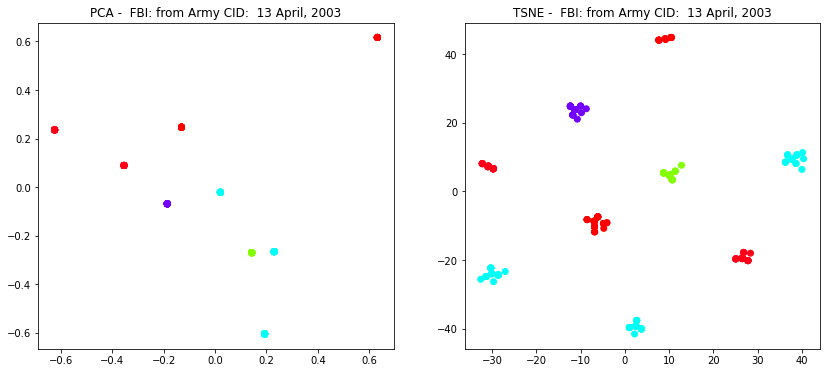

#####################################################################################
File Number: 1  -   FBI:  -  13 April, 2003
#####################################################################################
-------------------------------------------------
Top Keywords For Each Cluster For Each File
-------------------------------------------------

Cluster 0
licenses 1212 mcrae,given licenses,given licenses 1212,address given,address,blvd el paso texas,address given licenses 1212,address given licenses,given licenses 1212 mcrae,licenses 1212 mcrae blvd

Cluster 1
arnaido,spoke spanish texas,spoke spanish texas drivers,arnaido gueterrez,names,names vincent,names vincent cortez,names vincent cortez arnaido,spanish texas drivers licenses,spoke spanish

Cluster 2
carried 20 000,carried 20,police,police station discovered,police station discovered man,carried,station,station discovered,discovered man,000

Cluster 3
scheduled leave,scheduled,texas scheduled,april 2003,april,2003,el

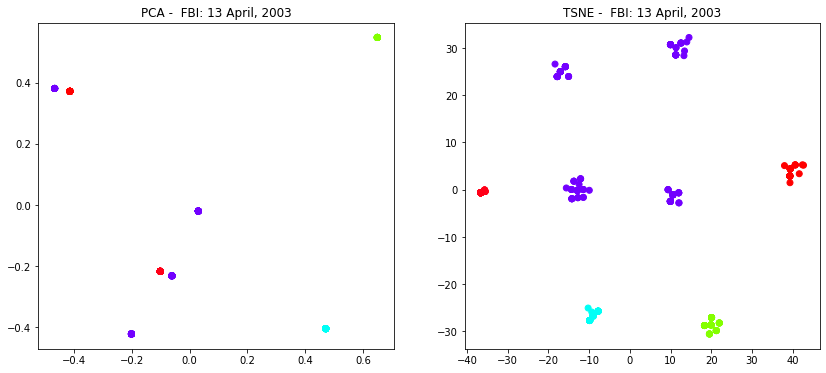

#####################################################################################
File Number: 2  -   2003  -  15 April
#####################################################################################
-------------------------------------------------
Top Keywords For Each Cluster For Each File
-------------------------------------------------

Cluster 0
april 2003 company,explosives,company reported 200,company reported,company manufacturer military explosives,company manufacturer military,company manufacturer,company,company reported 200 pounds,virginia

Cluster 1
various types including,company manufacturer,including,explosives various types including,explosives various types,explosives various,explosives,company manufacturer military,military explosives various types,military explosives various

Cluster 2
april 2003 company,explosives,company reported 200,company reported,company manufacturer military explosives,company manufacturer military,company manufacturer,company,com

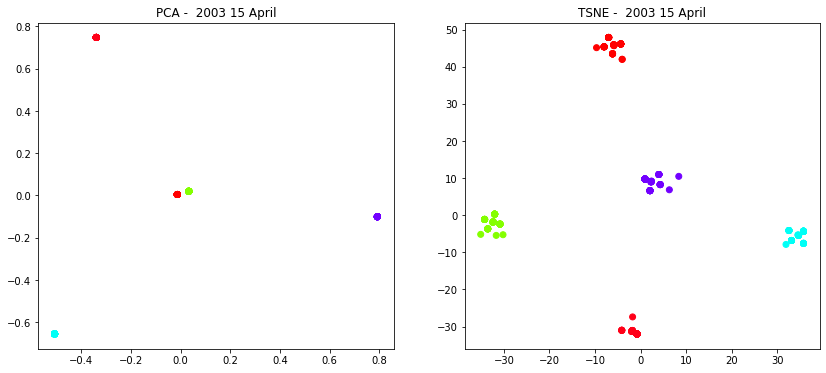

#####################################################################################
File Number: 3  -   FBI:  -  15, April 2003
#####################################################################################
-------------------------------------------------
Top Keywords For Each Cluster For Each File
-------------------------------------------------

Cluster 0
disappearance possible,disappearance,depot store lee highway,depot store lee,depot store,depot,clark adams middle eastern,clark adams middle,clark,va

Cluster 1
adams,disappearance,adams family explanation,adams family explanation disappearance,explanation,explanation disappearance,family,family explanation,adams family,family explanation disappearance

Cluster 2
home 1830hrs home,home 1830hrs,highway merrifield,highway,adams middle,adams middle eastern,adams middle eastern expert,left home,13,home

Cluster 3
disappearance possible case,depot store lee,depot store,depot,report,special,report dr,special report,special repo

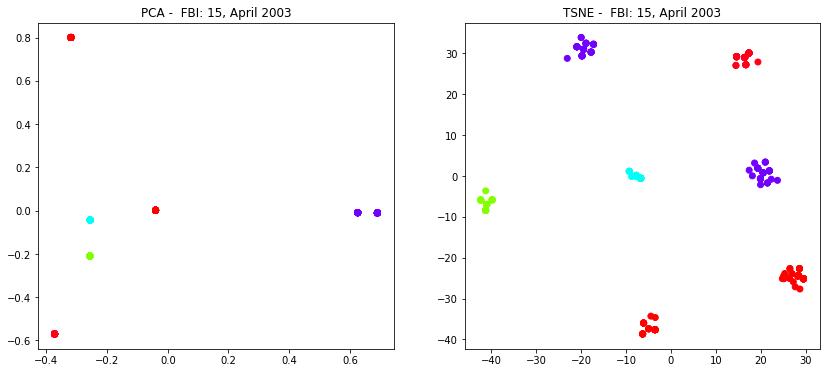

#####################################################################################
File Number: 4  -   FBI:  -  5 April, 2003
#####################################################################################
-------------------------------------------------
Top Keywords For Each Cluster For Each File
-------------------------------------------------

Cluster 0
hamburg germany trips,hamburg,cairo egypt months,germany trips cairo egypt,germany trips cairo,19971 trips amsterdam trips,19971 trips amsterdam,hamburg germany,germany trips,trips

Cluster 1
passport agency wash,agency,issued passport agency,issued passport,issued,holder passport 177183634 issued,holder passport 177183634,passport 177183634 issued,passport 177183634,passport

Cluster 2
phone number address 703,phone number address,phone number,phone,address 703 734,address 703 734 0104,number,number address,703 734,0104

Cluster 3
amsterdam trips hamburg germany,cairo,cairo egypt,cairo egypt months,control,control dulles,

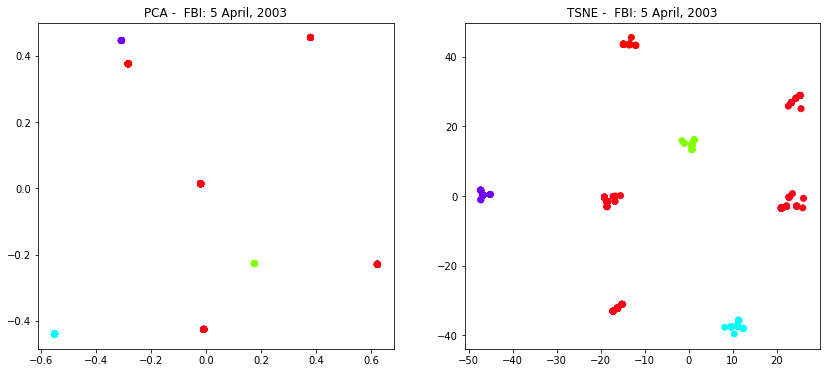

#####################################################################################
File Number: 5  -   FBI:  -  8 April, 2003
#####################################################################################
-------------------------------------------------
Top Keywords For Each Cluster For Each File
-------------------------------------------------

Cluster 0
st,turned left,turned,sheldon,left sheldon,left sheldon st,turned left sheldon,sheldon st,left,turned left sheldon st

Cluster 1
park,el segundo california,el segundo,el,city park,city park el,city park el segundo,park el,park el segundo california,california

Cluster 2
los angeles police,los angeles police turn,returned april ryder agent,returned april ryder,returned april,agent notified los angeles,agent notified los,police turn notified,notified los angeles police,notified

Cluster 3
hrs,april 2003 0600 hrs,april 2003 0600,rental,police,men,april 2003,2003,april,truck

Cluster 4
agent need small,agent need,furniture cul

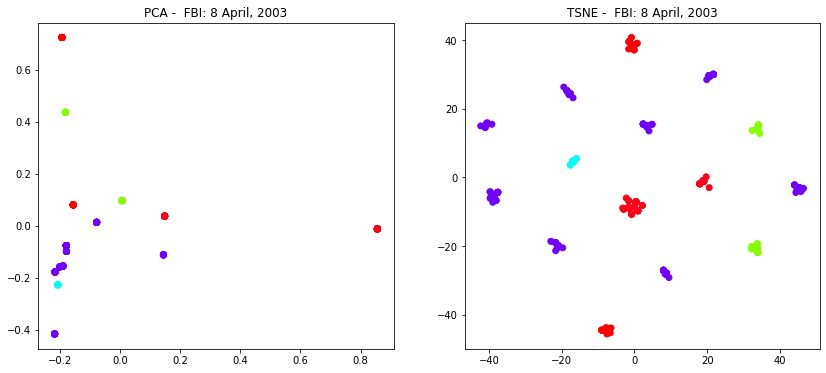

#####################################################################################
File Number: 6  -   FBI:  -  1 April, 2003
#####################################################################################
-------------------------------------------------
Top Keywords For Each Cluster For Each File
-------------------------------------------------

Cluster 0
deposited account past,deposited account,deposited,checks totaling 35 000,checks totaling 35,checks totaling,checks,dubai,having drawn accounts,bank

Cluster 1
bank lists select,lists select gourmet,lists select,lists,holding account number,account number 1070173749003,account number,holding account,bank lists,foods holding

Cluster 2
owner select gourmet foods,abdul ramazi owner select,abdul ramazi owner,ramazi,ramazi owner,ramazi owner select,ramazi owner select gourmet,owner select gourmet,va,springfield

Cluster 3
listed possible conduits,listed possible conduits money,possible conduits money,schemes,possible conduits 

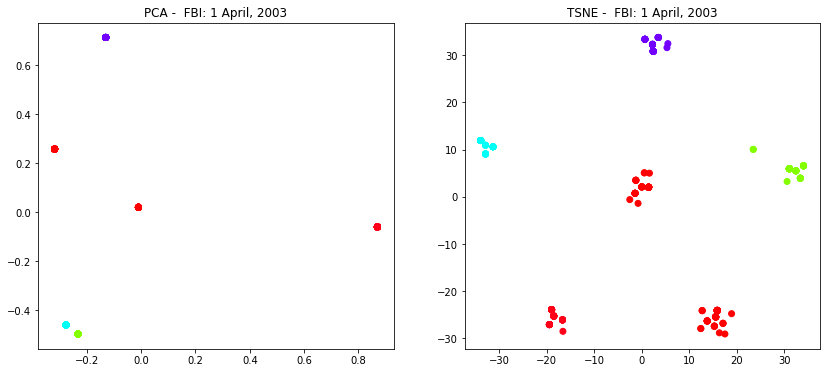

#####################################################################################
File Number: 7  -   FBI:  -  20 April, 2003
Error! Clusters are too small. Skipping.
#####################################################################################
#####################################################################################
File Number: 8  -   FBI:   -  19 April, 2003
Error! Clusters are too small. Skipping.
#####################################################################################
#####################################################################################
File Number: 9  -   2003  -  April 18
#####################################################################################
-------------------------------------------------
Top Keywords For Each Cluster For Each File
-------------------------------------------------

Cluster 0
candy,new,new york,york,nyse,state,services,machines,vending,security

Cluster 1
home,ave,home address,307 queens nyc,30

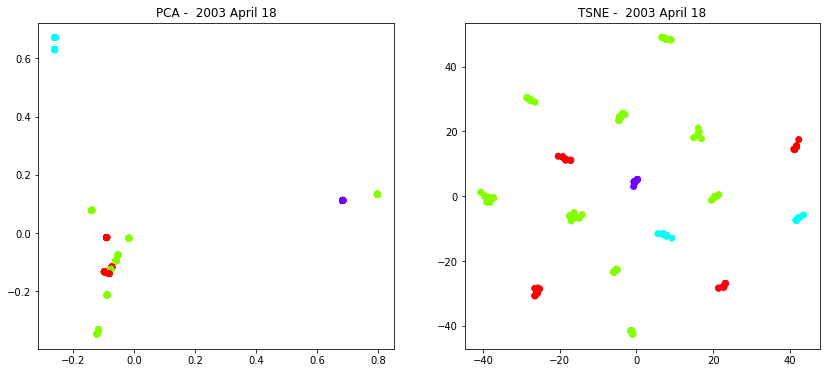

#####################################################################################
File Number: 10  -   FBI:   -  18 April, 2003
#####################################################################################
-------------------------------------------------
Top Keywords For Each Cluster For Each File
-------------------------------------------------

Cluster 0
semesters,persons attended classes past,attended classes past semesters,attended classes past,attended classes,attended,persons attended classes,persons attended,past,reveal persons attended classes

Cluster 1
enrolled,enrolled university virginia,virginia charlottesville,enrolled university virginia charlottesville,university virginia charlottesville,enrolled university,university virginia,charlottesville,university,virginia

Cluster 2
sprint,sprint cell,sprint cell phone,sprint cell phone 804,cell phone 804 774,cell phone 804,cell phone,phone providers,check mobile phone,phone

Cluster 3
student,student visas,student 

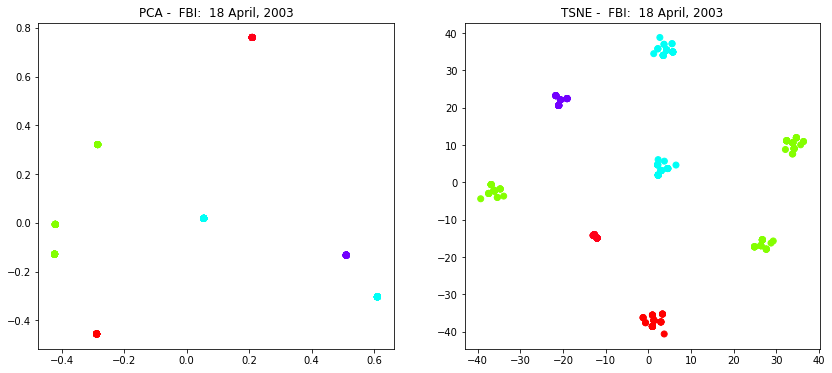

#####################################################################################
File Number: 11  -   2003: FBI:   -  20 April
Error! Clusters are too small. Skipping.
#####################################################################################
#####################################################################################
File Number: 12  -   FBI:  -  20 April, 2003
Error! Clusters are too small. Skipping.
#####################################################################################
#####################################################################################
File Number: 13  -   FBI:   -  22 April, 2003
Error! Clusters are too small. Skipping.
#####################################################################################
#####################################################################################
File Number: 14  -   FBI:  -  22 April, 2003
Error! Clusters are too small. Skipping.
####################################################

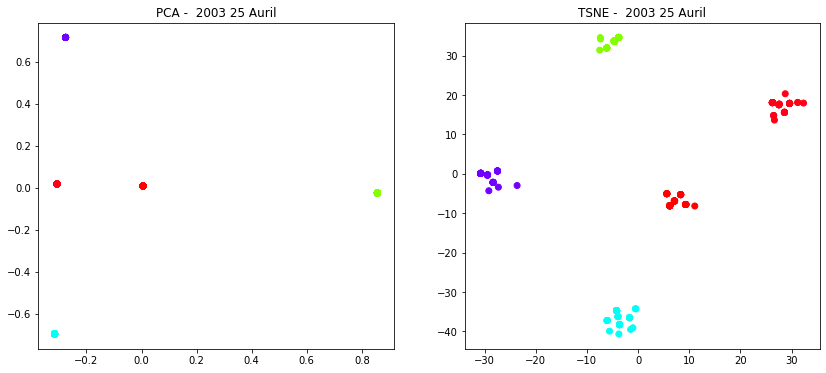

#####################################################################################
File Number: 16  -   2003  -  27 April
#####################################################################################
-------------------------------------------------
Top Keywords For Each Cluster For Each File
-------------------------------------------------

Cluster 0
labeled,labeled private,labeled private open,discovered cartons labeled,discovered cartons,discovered,blaze discovered cartons labeled,blaze discovered cartons,cartons labeled,discovered cartons labeled private

Cluster 1
discovered cartons labeled,discovered cartons labeled private,cigarette butt waste basket,waste basket basement shop,cartons,contained,explosive,contained explosive,cartons contained explosive,cartons contained

Cluster 2
carpet shop later told,police al hallak,police al,police,al hallak,al,hallak,shop,carpet,carpet shop

Cluster 3
reach hani,hani al hallak successful,attempts,attempts reach,attempts reach ha

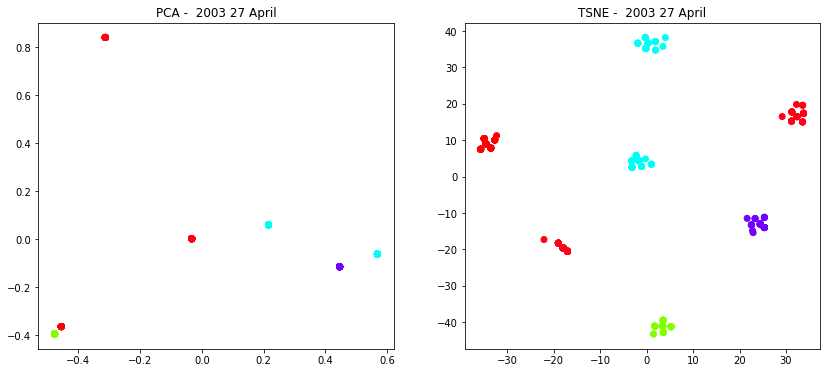

#####################################################################################
File Number: 17  -   FBI:  -  27 April, 2003
Error! Clusters are too small. Skipping.
#####################################################################################
#####################################################################################
File Number: 18  -   2003  -   25 April
#####################################################################################
-------------------------------------------------
Top Keywords For Each Cluster For Each File
-------------------------------------------------

Cluster 0
colorado driver license masood,colorado far,colorado far tne,colorado far tne camp,complex,complex stated,yaser rented apartment 206,truck,tires,truck tires

Cluster 1
colorado far,george west military,george west,george,denver colorado,haul truck abandoned,truck,haul,colorado,denver

Cluster 2
road apartment,license 1660 coal road,license 1660 coal,license 1660,road,addre

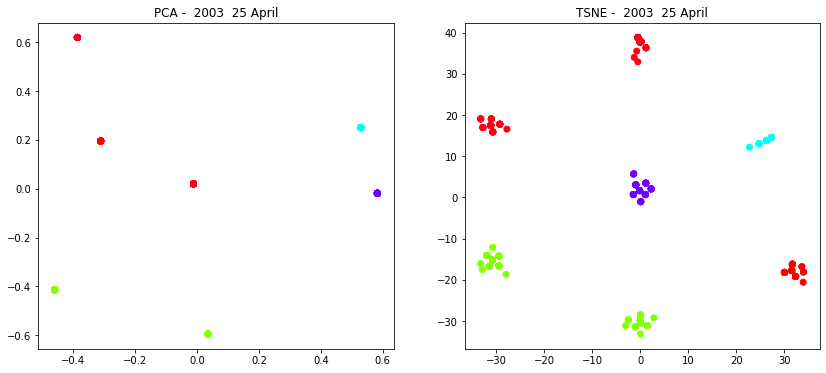

#####################################################################################
File Number: 19  -   FBI:  -  26 April, 2003
Error! Clusters are too small. Skipping.
#####################################################################################
#####################################################################################
File Number: 20  -   Coast Guard intelligence to FBI and CIA:  -  26 April, 2003
#####################################################################################
-------------------------------------------------
Top Keywords For Each Cluster For Each File
-------------------------------------------------

Cluster 0
cargo,bound usa,bound holland queen bound,bound holland queen,bound holland,bound boston,bound,boston holland queen 29,boston holland,usa

Cluster 1
datelplace destination cargo manifest,datelplace destination cargo,datelplace destination,datelplace,crew roster required 96,report contains,report contains departure,report contains de

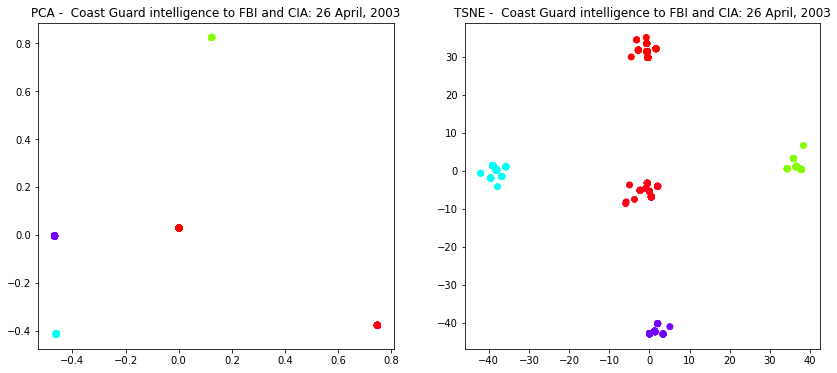

#####################################################################################
File Number: 21  -   2003  -  27 April
Error! Clusters are too small. Skipping.
#####################################################################################
#####################################################################################
File Number: 22  -   FBI:  -  27 April, 2003
Error! Clusters are too small. Skipping.
#####################################################################################
#####################################################################################
File Number: 24  -   2003  -  15 April
#####################################################################################
-------------------------------------------------
Top Keywords For Each Cluster For Each File
-------------------------------------------------

Cluster 0
believed,attempted purchase continental airlines,attempted purchase continental,attempted purchase airline tickets,attempted

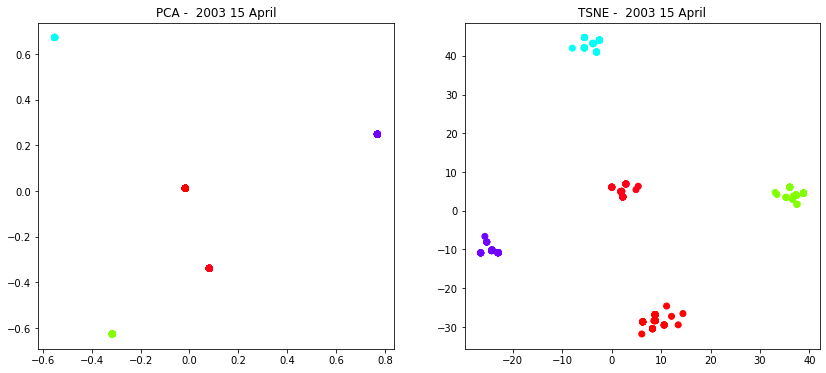

#####################################################################################
File Number: 25  -   FBI: Special Report:   -  16 April, 2003
#####################################################################################
-------------------------------------------------
Top Keywords For Each Cluster For Each File
-------------------------------------------------

Cluster 0
return address,alder st seattle,alder st,address 1635,address 1635 alder,address 1635 alder st,alder,st seattle washington,alder st seattle washington,return

Cluster 1
police treated package,bombs,police treated,package bombs,seattle police,given seattle police treated,given seattle police,given seattle,package,packages given

Cluster 2
field,field managed,field managed police,field managed police purposes,given,given seattle,given seattle police,employee stated believed,washington 15 apr 2003,seattle

Cluster 3
set,set vacant field,set vacant,field managed police purposes,field managed police,field man

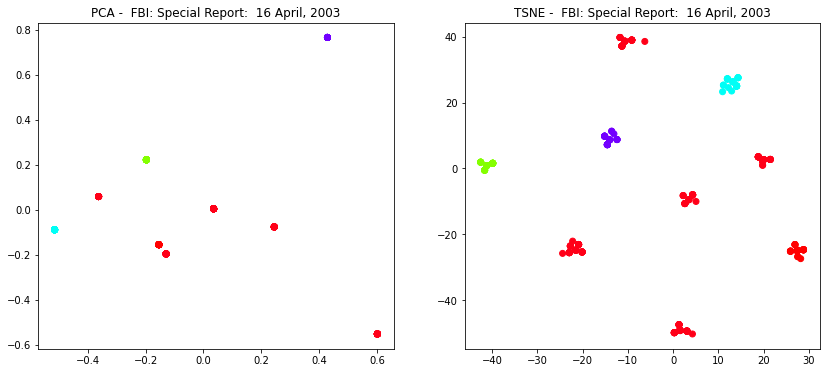

In [5]:
for key, value in jsonDataSet.items():

    try:
        clusters = MiniBatchKMeans(n_clusters=5, init_size=1024, batch_size=2048, random_state=20).fit_predict(value["tfidf"])
    except ValueError:
        print("#####################################################################################")
        print("File Number: {}".format(key), " - ", value["title"], " - ", value["date"])
        print("Error! Clusters are too small. Skipping.")
        print("#####################################################################################")
        continue
    
    
    print("#####################################################################################")
    print("File Number: {}".format(key), " - ", value["title"], " - ", value["date"])
    print("#####################################################################################")
    
    
    plot_tsne_pca(value["tfidf"], clusters, value["title"], value["date"])
    get_top_keywords(value["tfidf"], clusters, value["tfidf_features"], 10, value)
    plt.show()

In [6]:
pprint.pprint(jsonDataSet.items())

dict_items([(0, {'title': ' FBI: from Army CID: ', 'date': '13 April, 2003', 'text': " A man who gave his name as Wallace Wilson was arrested at 1730hrs on 10 April, 2003 at Camp George West Military Reservation in Denver, Colorado. Wilson was able to obtain access to this military reservation using personal identification in the form of a Colorado driver's license and a Social security card. He also used identification for the truck he was driving that is owned by his employer, the Apex Paper Products Company in Denver, Colorado. This company has a contract to supply paper products to Camp George West. A man by the name wallace Wilson is known to be a member of a domestic militia group known as Aryan Nations. Wilson was arrested by MPs when he was seen loading boxes on his Apex truck. The boxes were being taken from an apparently unlocked storage facility at Camp George West. The boxes contained 50 Cal ammunition and several land mines.", 'bow_matrix': array([[1, 1, 1, ..., 0, 0, 0],
